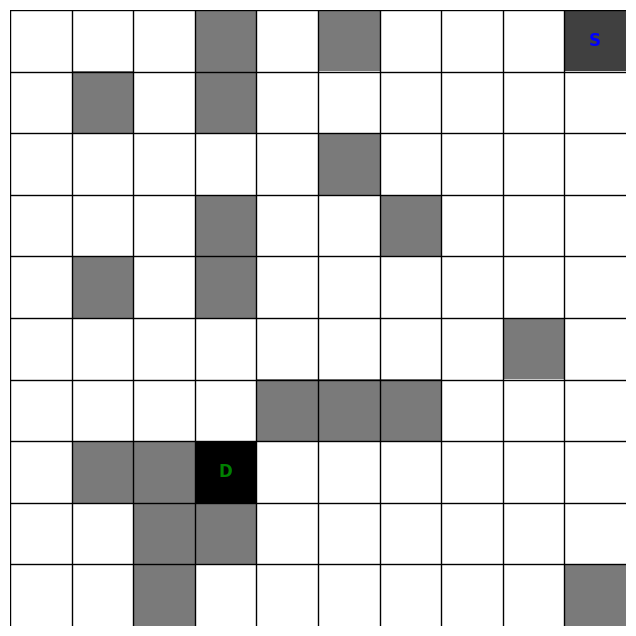

In [1]:
import random
import matplotlib.pyplot as plt


def generate_grid(x):
    grid = [[0 for _ in range(x)] for _ in range(x)]
    for _ in range(int(0.2 * x * x)):  # Assuming 20% of the grid is obstacles
        i, j = random.randint(0, x-1), random.randint(0, x-1)
        grid[i][j] = 1
    start = (random.randint(0, x-1), random.randint(0, x-1))
    dest = start
    while abs(dest[0] - start[0]) + abs(dest[1] - start[1]) < 3:
        dest = (random.randint(0, x-1), random.randint(0, x-1))
    grid[start[0]][start[1]] = 'S'
    grid[dest[0]][dest[1]] = 'D'
    return grid


def visualize_grid(grid):
    plt.figure(figsize=(8, 8))
    grid_int = [[0 if val == 0 else (3 if val == 1 else (
        4 if val == 'S' else 5)) for val in row] for row in grid]
    plt.imshow(grid_int, cmap='Greys', interpolation='nearest')
    for i in range(len(grid)):
        plt.axhline(i - 0.5, color='black', lw=1)  # horizontal lines
    for j in range(len(grid[0])):
        plt.axvline(j - 0.5, color='black', lw=1)  # vertical lines
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 'S':
                plt.text(j, i, 'S', ha='center', va='center',
                         color='blue', fontsize=12, fontweight='bold')
            elif grid[i][j] == 'D':
                plt.text(j, i, 'D', ha='center', va='center',
                         color='green', fontsize=12, fontweight='bold')
            # else:
            #     plt.text(j, i, f'({i},{j})', ha='center',
            #              va='center', color='red')

    plt.axis('off')
    plt.show()


grid_size = 10  # Change the grid size as needed
grid = generate_grid(grid_size)
visualize_grid(grid)

[[0, 0, 0, 'S', 0, 0], [0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 'D', 0, 0, 0]]


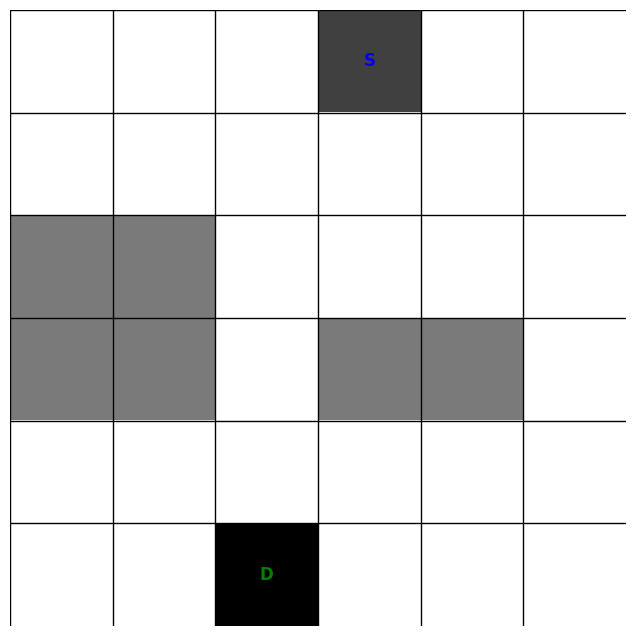

(0, 3) (5, 2)
[(0, 3), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2)]


In [3]:
import heapq


class Node:
    """
    A node class for A* Pathfinding
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __repr__(self):
        return f"{self.position} - g: {self.g} h: {self.h} f: {self.f}"

    # defining less than for purposes of heap queue
    def __lt__(self, other):
        return self.f < other.f

    # defining greater than for purposes of heap queue
    def __gt__(self, other):
        return self.f > other.f


def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path


def astar(maze, start, end, allow_diagonal_movement=False):
    """
    Returns a list of tuples as a path from the given start to the given end in the given maze
    :param maze:
    :param start:
    :param end:
    :return:
    """

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Heapify the open_list and Add the start node
    heapq.heapify(open_list)
    heapq.heappush(open_list, start_node)

    # Adding a stop condition
    outer_iterations = 0
    max_iterations = (len(maze[0]) * len(maze) // 2)

    # what squares do we search
    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)
    if allow_diagonal_movement:
        adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),
                            (-1, -1), (-1, 1), (1, -1), (1, 1),)

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1

        if outer_iterations > max_iterations:
            # if we hit this point return the path such as it is
            # it will not contain the destination
            return None

        # Get the current node
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []

        for new_position in adjacent_squares:  # Adjacent squares

            # Get node position
            node_position = (
                current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) - 1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) **
                       2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child.position == open_node.position and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            heapq.heappush(open_list, child)

    return None


def main():
    gen_board = generate_grid(6)
    print(gen_board)
    start = (0, 0)
    end = (0, 0)
    visualize_grid(gen_board)
    for i in range(len(gen_board)):
        for j in range(len(gen_board[i])):
            if gen_board[i][j] == 'S':
                start = (i, j)
                gen_board[i][j] = 0
            elif gen_board[i][j] == 'D':
                end = (i, j)
                gen_board[i][j] = 0
    print(start, end)
    path = astar(gen_board, start, end, True)

    print(path)


if __name__ == '__main__':
    main()